In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
data=pd.read_csv("netflix.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
data.shape

(8807, 12)

In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
data.rename(columns={"listed_in":"genre"},inplace=True)
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [6]:
data.drop(columns="show_id",inplace=True)


In [7]:
data.duplicated().sum()

0

In [8]:
null=data.isna().sum().sort_values(ascending=True)
percent=round(data.isna().mean()*100,2).sort_values(ascending=False)
missing_data=pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])
print("Total Records Present:",data.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','           ',missing_data['Missing Value Count'].sum(),'   ',round(100*(missing_data['Missing Value Count'].sum()/data.shape[0]),2))

Total Records Present: 8807
            Missing Value Count  Percentage
duration                      3        0.03
rating                        4        0.05
date_added                   10        0.11
cast                        825        9.37
country                     831        9.44
director                   2634       29.91
Total             4307     48.9


In [9]:
data.dropna(subset=['date_added'],inplace=True)
data['date_added'].isna().sum()

0

In [10]:
data.dropna(subset=['rating'],inplace=True)
data['rating'].isna().sum()

0

In [11]:
data.dropna(subset=['duration'],inplace=True)
data['duration'].isna().sum()

0

In [12]:
null=data.isna().sum().sort_values(ascending=True)
percent=round(data.isna().mean()*100,2).sort_values(ascending=False)
missing_data=pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])
print("Total Records Present:",data.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','           ',missing_data['Missing Value Count'].sum(),'   ',round(100*(missing_data['Missing Value Count'].sum()/data.shape[0]),2))

Total Records Present: 8790
          Missing Value Count  Percentage
cast                      825        9.39
country                   829        9.43
director                 2621       29.82
Total             4275     48.63


In [13]:
data['date_added']=pd.to_datetime(data['date_added'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [14]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
data['day']=data['date_added'].dt.day
data['month']=data['date_added'].dt.month
data['year']=data['date_added'].dt.year
data['month_name']=data['date_added'].dt.month_name()
data['weekday']=data['date_added'].dt.day_name()
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [16]:
data['rating']=data['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'KIDS')
data['rating']=data['rating'].replace(['PG-13','TV-14'],'Teens')
data['rating']=data['rating'].replace(['R','TV-MA','NC-17'],'adults')
data['rating']=data['rating'].replace(['NR','UR'],np.NaN)
data

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,adults,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20.0,11.0,2019.0,November,Wednesday
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,KIDS,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1.0,7.0,2019.0,July,Monday
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,adults,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1.0,11.0,2019.0,November,Friday
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,KIDS,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11.0,1.0,2020.0,January,Saturday


In [17]:
data.head(40)

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24.0,9.0,2021.0,September,Friday
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,KIDS,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,adults,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",24.0,9.0,2021.0,September,Friday
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,Teens,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,24.0,9.0,2021.0,September,Friday
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,Teens,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,24.0,9.0,2021.0,September,Friday


In [18]:
data['rating'].unique()

array(['Teens', 'adults', 'KIDS', nan], dtype=object)

In [19]:
data.dropna(subset=['rating'],inplace=True)
data['rating'].isna().sum()

0

In [20]:
null=data.isna().sum().sort_values(ascending=True)
percent=round(data.isna().mean()*100,2).sort_values(ascending=False)
missing_data=pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])
print("Total Records Present:",data.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','           ',missing_data['Missing Value Count'].sum(),'   ',round(100*(missing_data['Missing Value Count'].sum()/data.shape[0]),2))

Total Records Present: 8708
            Missing Value Count  Percentage
date_added                   87        1.00
day                          87        1.00
month                        87        1.00
year                         87        1.00
month_name                   87        1.00
weekday                      87        1.00
cast                        808        9.28
country                     829        9.52
director                   2617       30.05
Total             4776     54.85


In [21]:
data[(data['director'].isna())&(data['country'].isna())&(data['cast'].isna())].shape[0]

96

In [22]:
data.shape

(8708, 16)

In [23]:
data.dropna(subset=['director','country','cast'],how='all',inplace=True)
data.shape

(8612, 16)

In [24]:
data_cast=pd.DataFrame(data['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=data['title'])
data_cast=data_cast.stack()
data_cast=pd.DataFrame(data_cast)
data_cast.reset_index(inplace=True)
data_cast=data_cast[['title',0]]
data_cast.columns=['title','cast']
data_cast.replace('nan',np.NaN,inplace=True)
data_cast.isna().sum()

title      0
cast     712
dtype: int64

In [25]:
data_cast

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64246,Zubaan,Manish Chaudhary
64247,Zubaan,Meghna Malik
64248,Zubaan,Malkeet Rauni
64249,Zubaan,Anita Shabdish


In [26]:
data_genre=pd.DataFrame(data['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=data['title'])
data_genre=data_genre.stack()
data_genre=pd.DataFrame(data_genre)
data_genre.reset_index(inplace=True)
data_genre=data_genre[['title',0]]
data_genre.columns=['title','genre']
data_genre.replace('nan',np.NaN,inplace=True)
data_genre.isna().sum()

title    0
genre    0
dtype: int64

In [27]:
data_director=pd.DataFrame(data['director'].apply(lambda x: str(x).split(', ')).tolist(),index=data['title'])
data_director=data_director.stack()
data_director=pd.DataFrame(data_director)
data_director.reset_index(inplace=True)
data_director=data_director[['title',0]]
data_director.columns=['title','director']
data_director.replace('nan',np.NaN,inplace=True)
data_director.isna().sum()

title          0
director    2521
dtype: int64

In [28]:
data_country=pd.DataFrame(data['country'].apply(lambda x: str(x).split(', ')).tolist(),index=data['title'])
data_country=data_country.stack()
data_country=pd.DataFrame(data_country)
data_country.reset_index(inplace=True)
data_country=data_country[['title',0]]
data_country.columns=['title','country']
data_country.replace('nan',np.NaN,inplace=True)
data_country.isna().sum()

title        0
country    733
dtype: int64

In [29]:
df=data_cast.merge(data_genre,on='title')
df

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [30]:
df1=data_director.merge(df,on='title')
df1

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [31]:
df2=data_country.merge(df1,on='title')
df2

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [32]:
data_new=data.merge(df2,on='title')
data_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [33]:
data_new.drop(columns=['cast_x','country_x','director_x','genre_x'],inplace=True)
data_new.rename(columns={'country_y':'country','director_y':'director','genre_y':'genre','cast_y':'cast'},inplace=True)
data_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [34]:
data_new['cast']=data_new['cast'].replace(np.NaN,'Unknown')
data_new['country']=data_new['country'].replace(np.NaN,'Unknown')
data_new['director']=data_new['director'].replace(np.NaN,'Unknown')
data_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [35]:
data_new['cast'].replace(np.NaN,'Unknown',inplace=True)
data_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [36]:
data_new.drop_duplicates(keep='first',inplace=True)
data_new.shape

(199895, 16)

In [37]:
data_movies=data_new.loc[data_new['type']=='Movie']
data_tvs=data_new.loc[data_new['type']=="TV Show"]
data_movies.shape

(144240, 16)

In [38]:
data_tvs.shape

(55655, 16)

In [39]:
data_movies['duration']=data_movies['duration'].str.replace('min','')
data_movies.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,KIDS,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,KIDS,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,KIDS,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,KIDS,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [40]:
data_tvs['duration']=data_tvs['duration'].str.replace('Seasons','')
data_tvs['duration']=data_tvs['duration'].str.replace('Season','')
data_tvs.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [41]:
data_tvs.rename(columns={'duration':'seasons'},inplace=True)

In [42]:
print(data['year'].min())
print(data['year'].max())

2008.0
2021.0


In [43]:
data.groupby('type')['type'].count()

type
Movie      6031
TV Show    2581
Name: type, dtype: int64

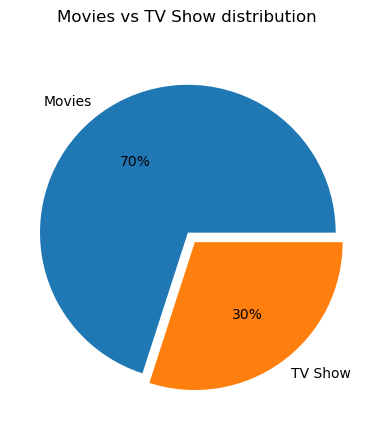

<Figure size 640x480 with 0 Axes>

In [44]:
labels=['Movies','TV Show']
plt.pie(data.groupby('type')['type'].count(),labels=labels,explode=(0.08,0),autopct='%0.0f%%')
plt.suptitle('Movies vs TV Show distribution')
plt.show()
plt.savefig("1.png")

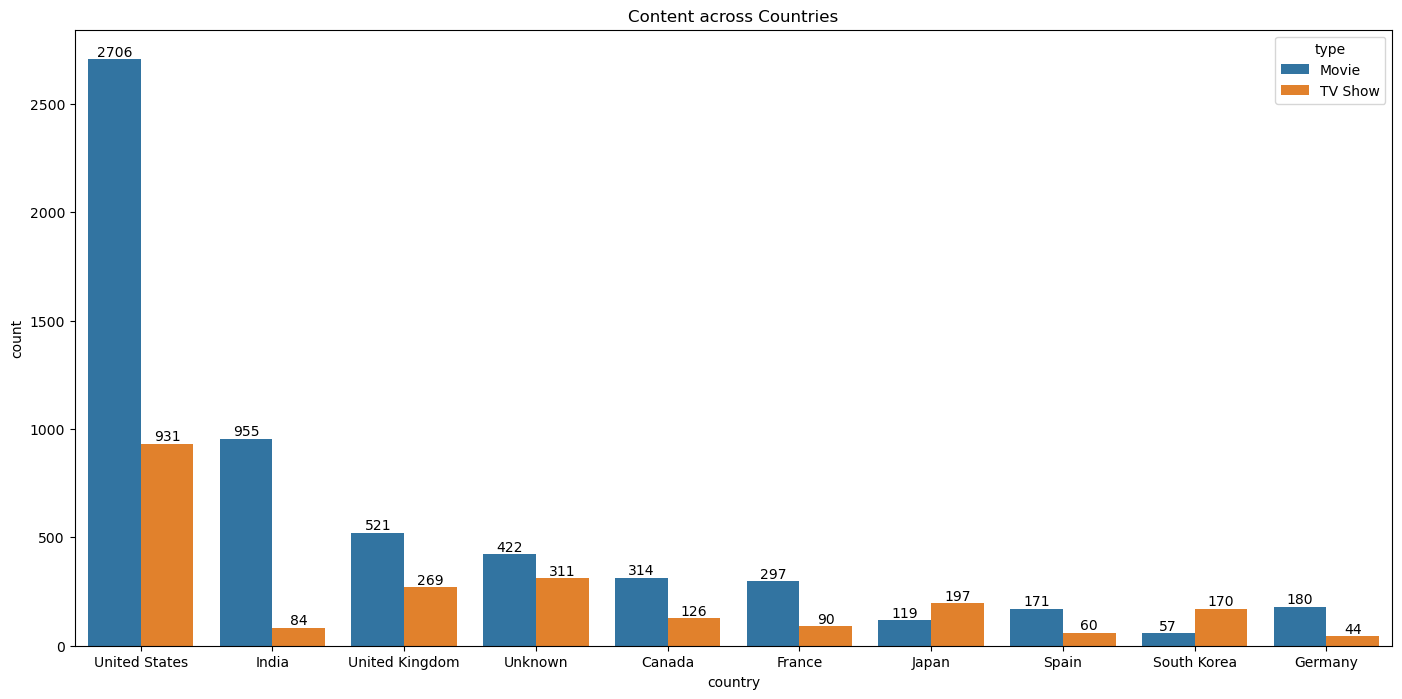

In [45]:
data_temp=data_new.drop_duplicates(subset=['country','title'])
x=data_temp['country'].value_counts().head(10)
plt.figure(figsize=(17,8))
plt.title('Content across Countries')
label=sns.countplot(data=data_temp,x='country',hue='type',order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()


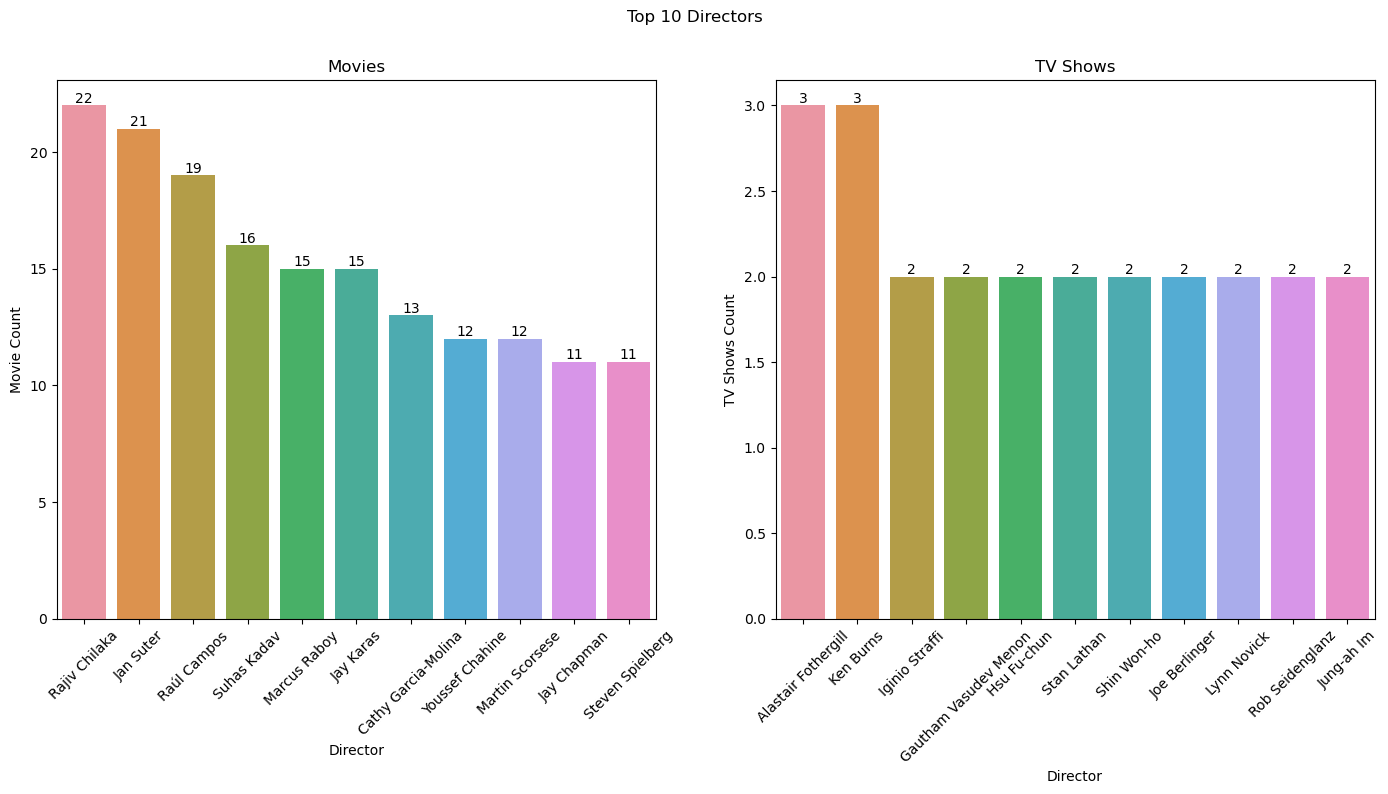

In [46]:
data_movies_temp=data_movies.drop_duplicates(subset=['director','title'])
data_tvs_temp=data_tvs.drop_duplicates(subset=['director','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Directors')
plt.subplot(1,2,1)
label=sns.countplot(data=data_movies_temp,x='director',order=data_movies_temp["director"].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=data_tvs_temp,x='director',order=data_tvs_temp["director"].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('TV Shows Count')
plt.show()

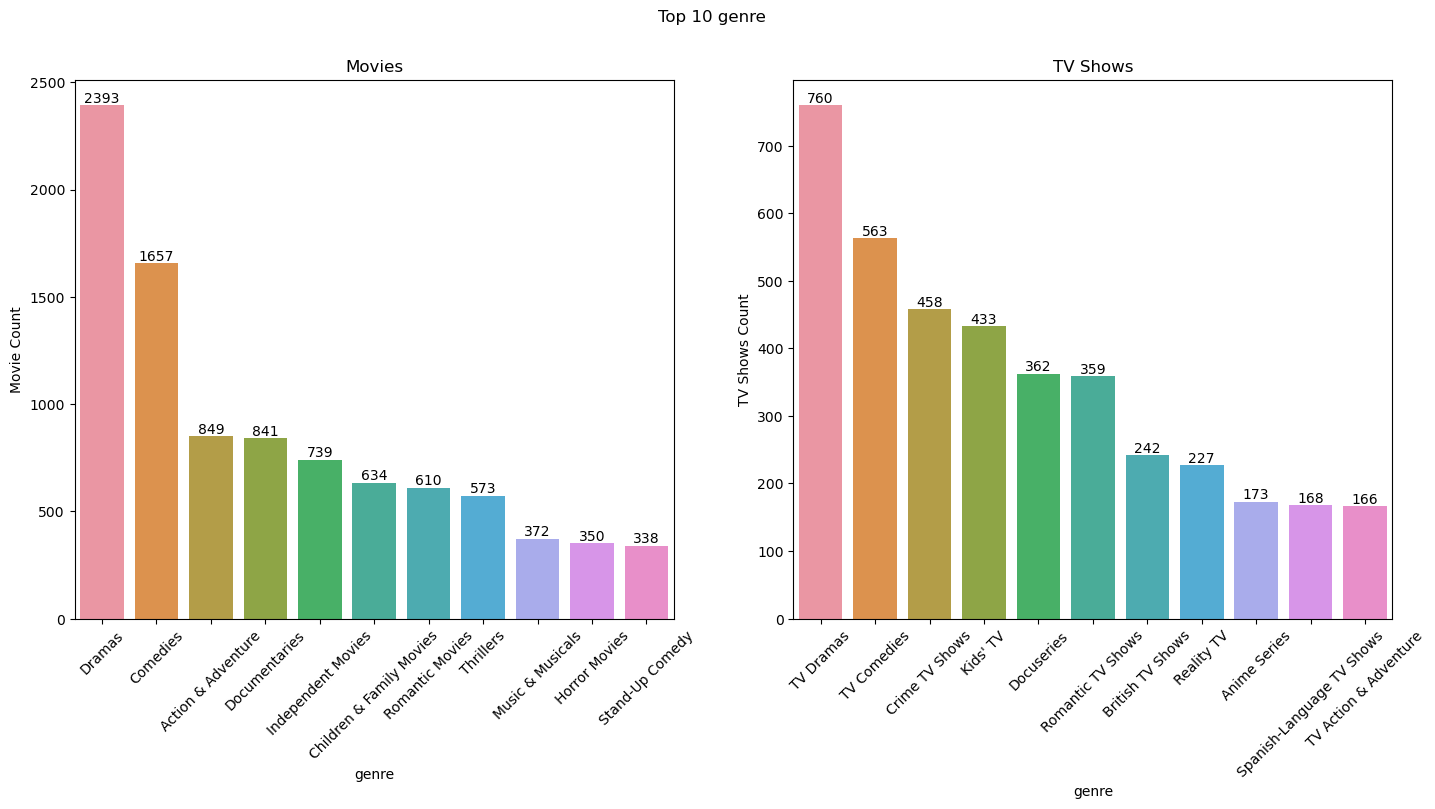

In [47]:
data_movies_temp=data_movies.drop_duplicates(subset=['genre','title'])
data_tvs_temp=data_tvs.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 genre')
plt.subplot(1,2,1)
label=sns.countplot(data=data_movies_temp,x='genre',order=data_movies_temp["genre"].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('genre')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=data_tvs_temp,x='genre',order=data_tvs_temp["genre"].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('genre')
plt.ylabel('TV Shows Count')
plt.show()

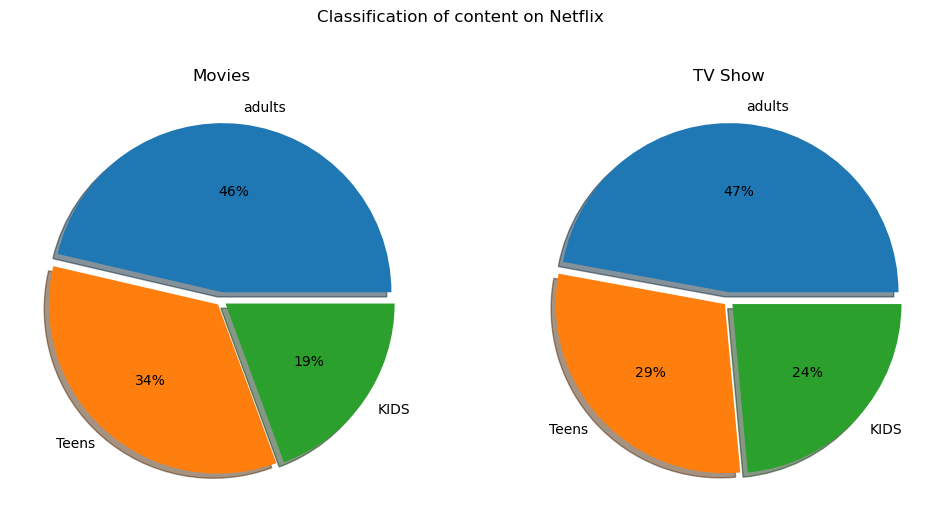

In [48]:
data_movies_temp=data_movies.drop_duplicates(subset=['genre','title'])
data_tvs_temp=data_tvs.drop_duplicates(subset=['genre','title'])

plt.figure(figsize=(12,6))
plt.suptitle('Classification of content on Netflix')

plt.subplot(1,2,1)
plt.pie(data_movies_temp['rating'].value_counts(),labels=data_movies_temp["rating"].value_counts().index,autopct='%.0f%%',explode=(0.05,0.03,0.03),shadow=True)
plt.title("Movies")

plt.subplot(1,2,2)
plt.pie(data_tvs_temp['rating'].value_counts(),labels=data_tvs_temp["rating"].value_counts().index,autopct='%.0f%%',explode=(0.05,0.03,0.03),shadow=True)
plt.title("TV Show")

plt.show()


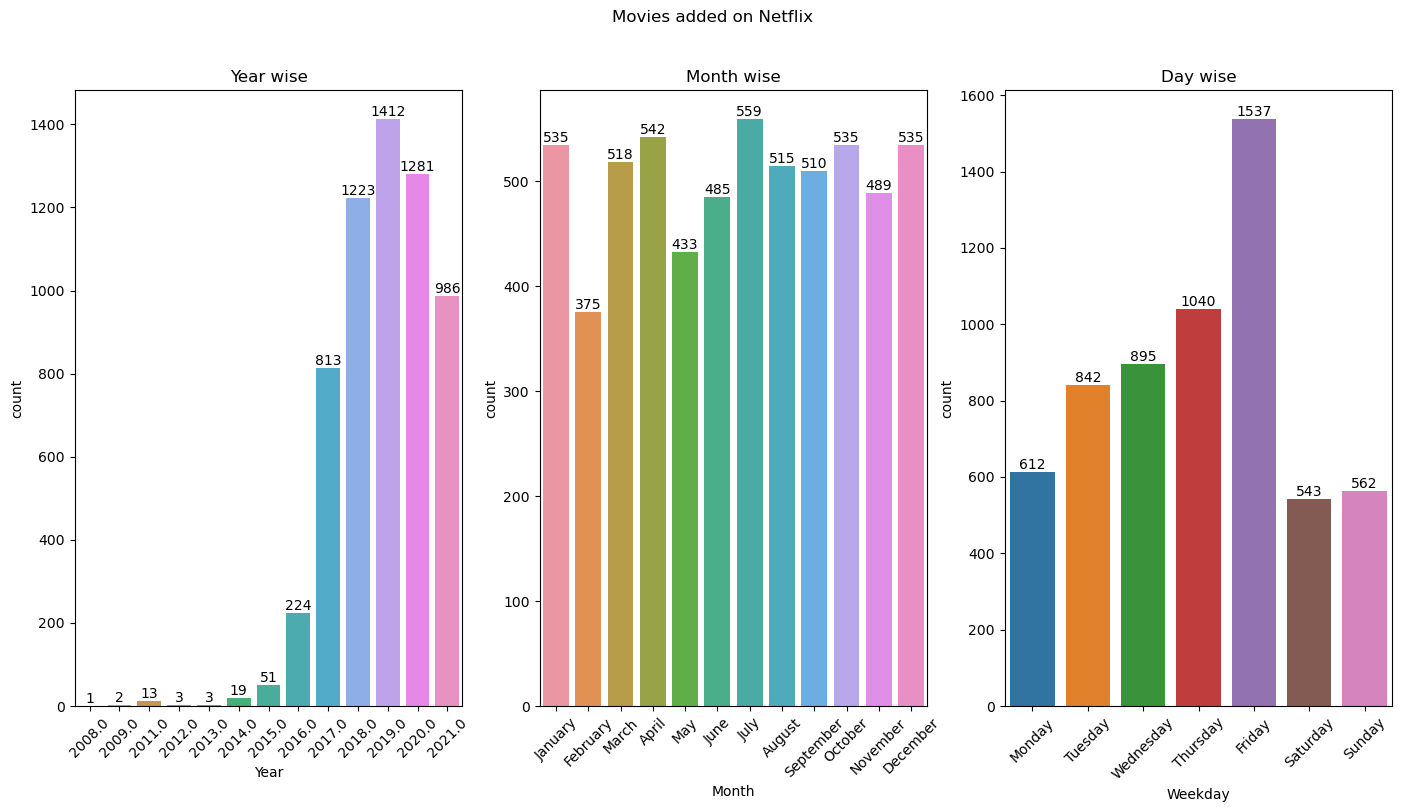

In [49]:
data_movies_temp = data_movies.drop_duplicates(subset = ['year','title'])


mv_year = data_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = data_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = data_movies_temp['weekday'].value_counts().loc[day_order]
plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=data_movies_temp, x='year', order = mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')
plt.subplot(1,3,2)
label = sns.countplot(data=data_movies_temp, x='month_name', order = mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=data_movies_temp, x='weekday', order = mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')
plt.show()

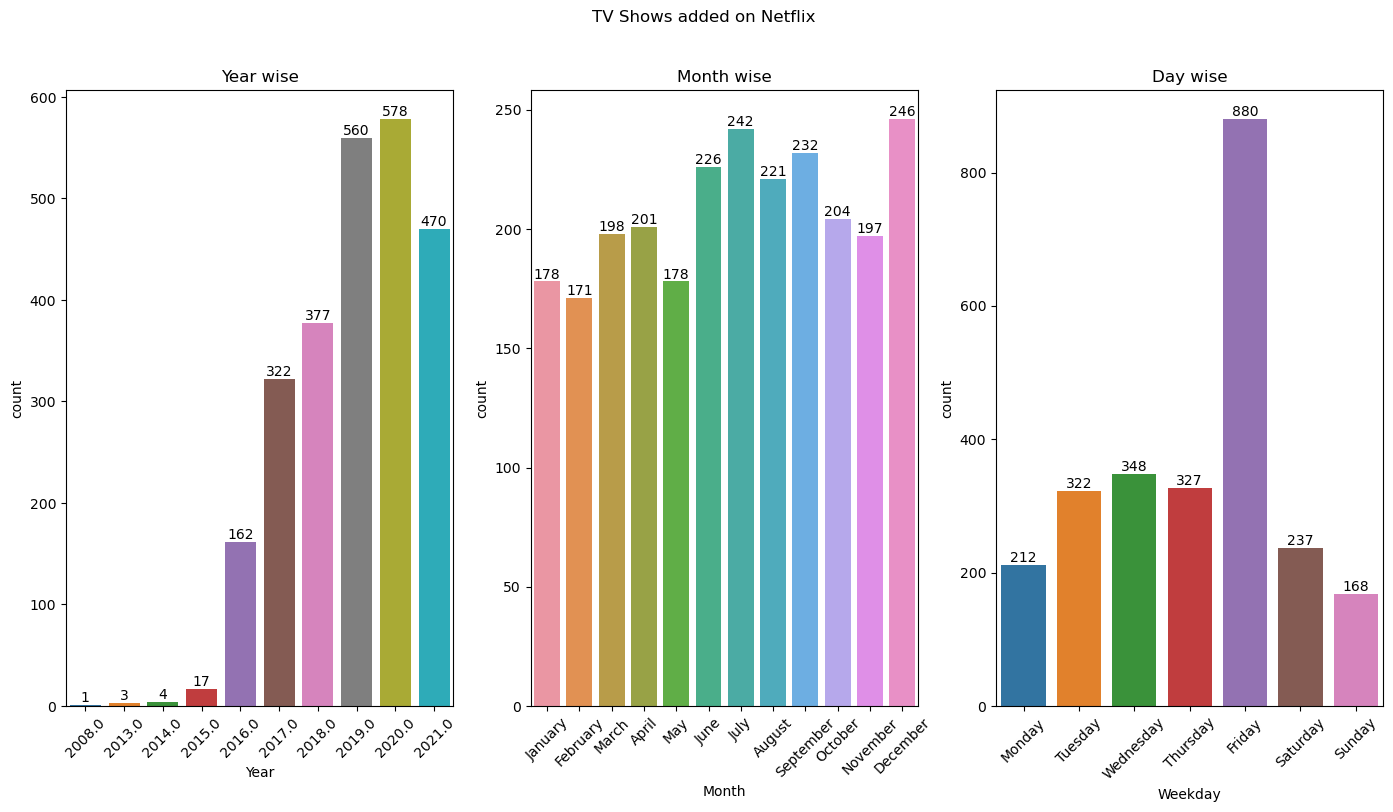

In [52]:
data_tvs_temp = data_tvs.drop_duplicates(subset = ['year','title'])

tv_year = data_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tv_month = data_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = data_tvs_temp['weekday'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=data_tvs_temp, x='year', order = tv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=data_tvs_temp, x='month_name', order = tv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=data_tvs_temp, x='weekday', order = tv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

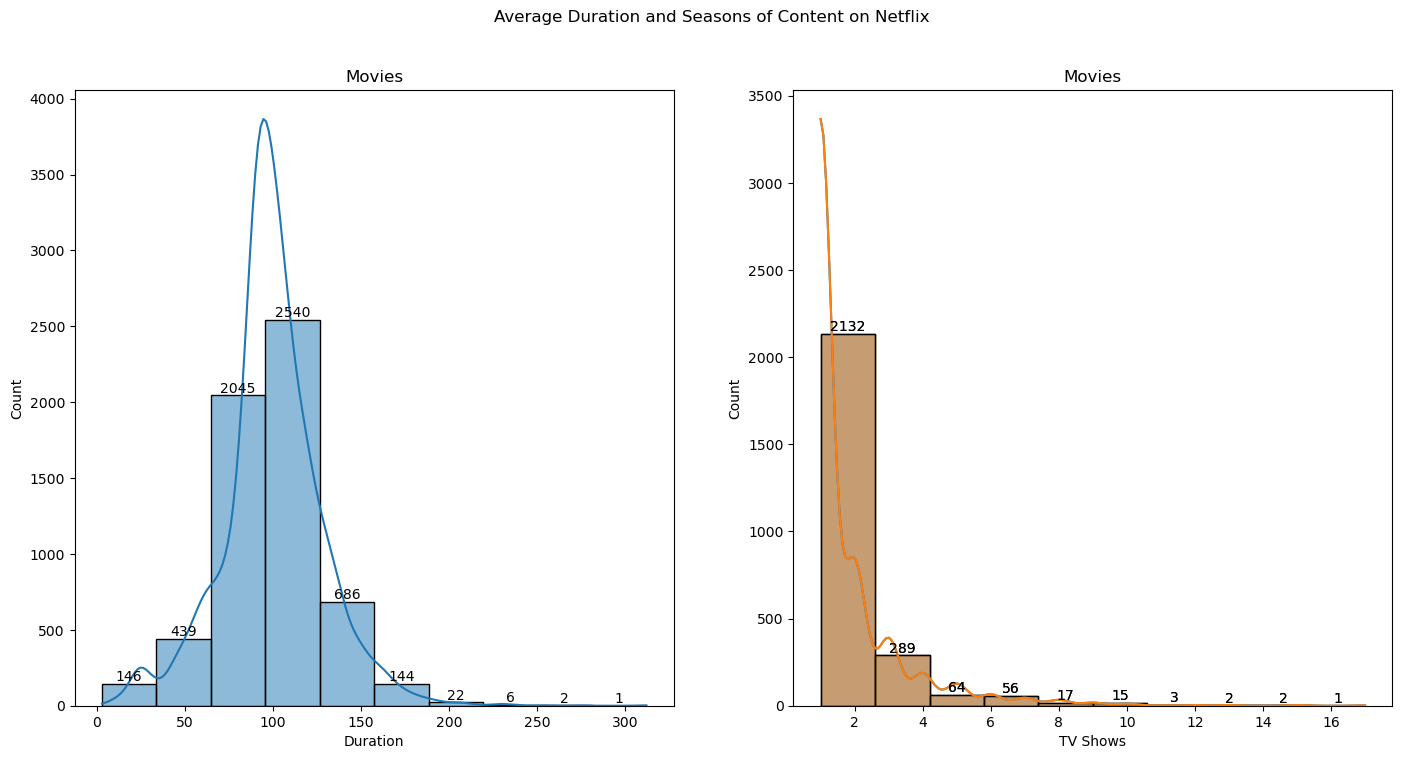

In [59]:
data_movies_temp = data_movies.drop_duplicates(subset = ['duration', 'title'])
data_tvs_temp = data_tvs.drop_duplicates(subset = ['seasons', 'title'])
plt. figure(figsize=(17,8))
plt. suptitle('Average Duration and Seasons of Content on Netflix')
plt. subplot (1,2,1)
label = sns.histplot(data_movies_temp['duration'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label (i)
plt.xlabel ('Duration')
plt. title( 'Movies')
plt. subplot (1,2,2)
label = sns.histplot(data_tvs_temp['seasons'].astype(int), bins=10, kde = True)
for i in label.containers:
    label. bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')
plt.subplot(1,2,2)
lael=sns.histplot(data_tvs_temp['seasons'].astype(int),bins=10,kde=True)
label. bar_label(i)
plt.xlabel('TV Shows')
plt.title('Movies')
plt.show()

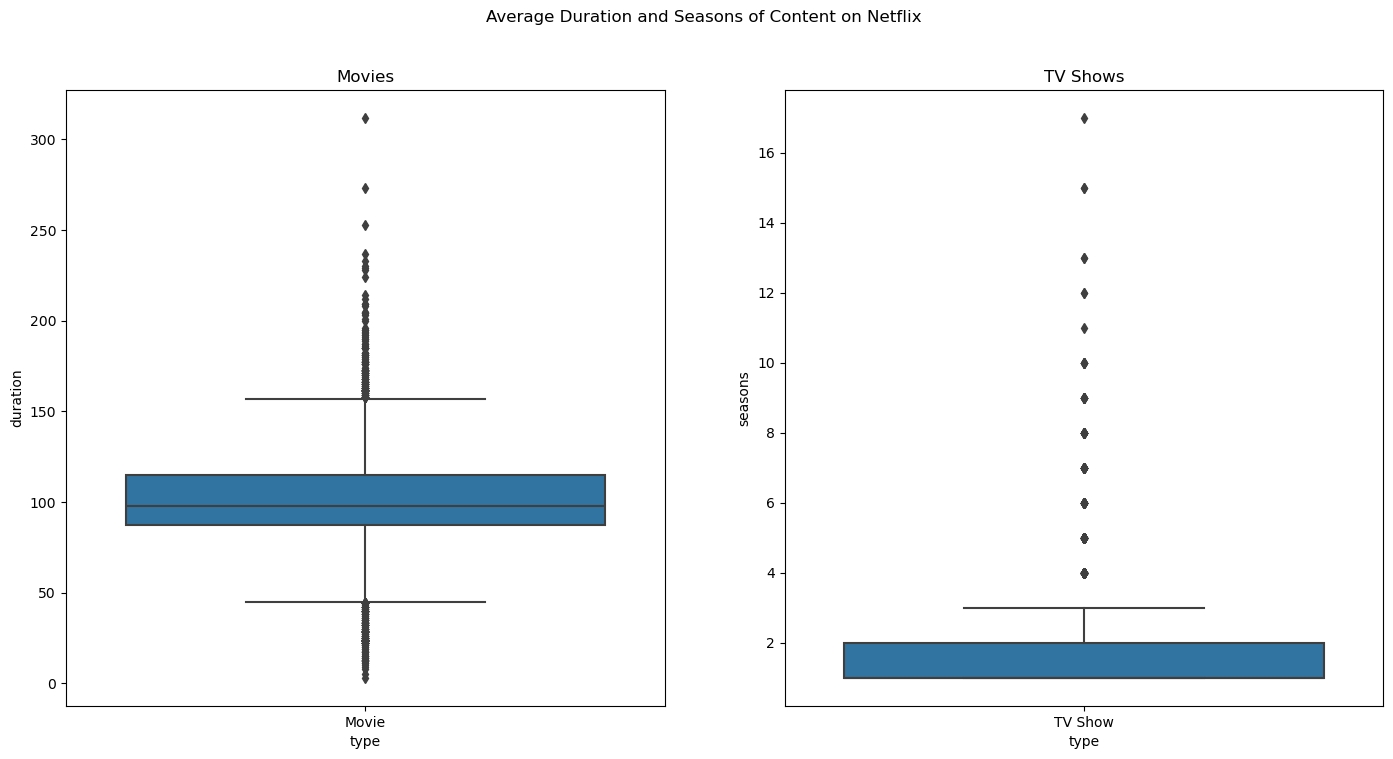

In [63]:
data_movies_temp['duration'] = data_movies_temp['duration'].astype(int)
data_tvs_temp['seasons'] = data_tvs_temp['seasons'].astype(int)
plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')
plt. subplot (1,2,1)
sns. boxplot(data_movies_temp, x='type', y='duration')
plt. title('Movies')
plt. subplot (1,2,2)
sns.boxplot(data_tvs_temp, x='type', y='seasons')
plt. title('TV Shows')
plt.show()


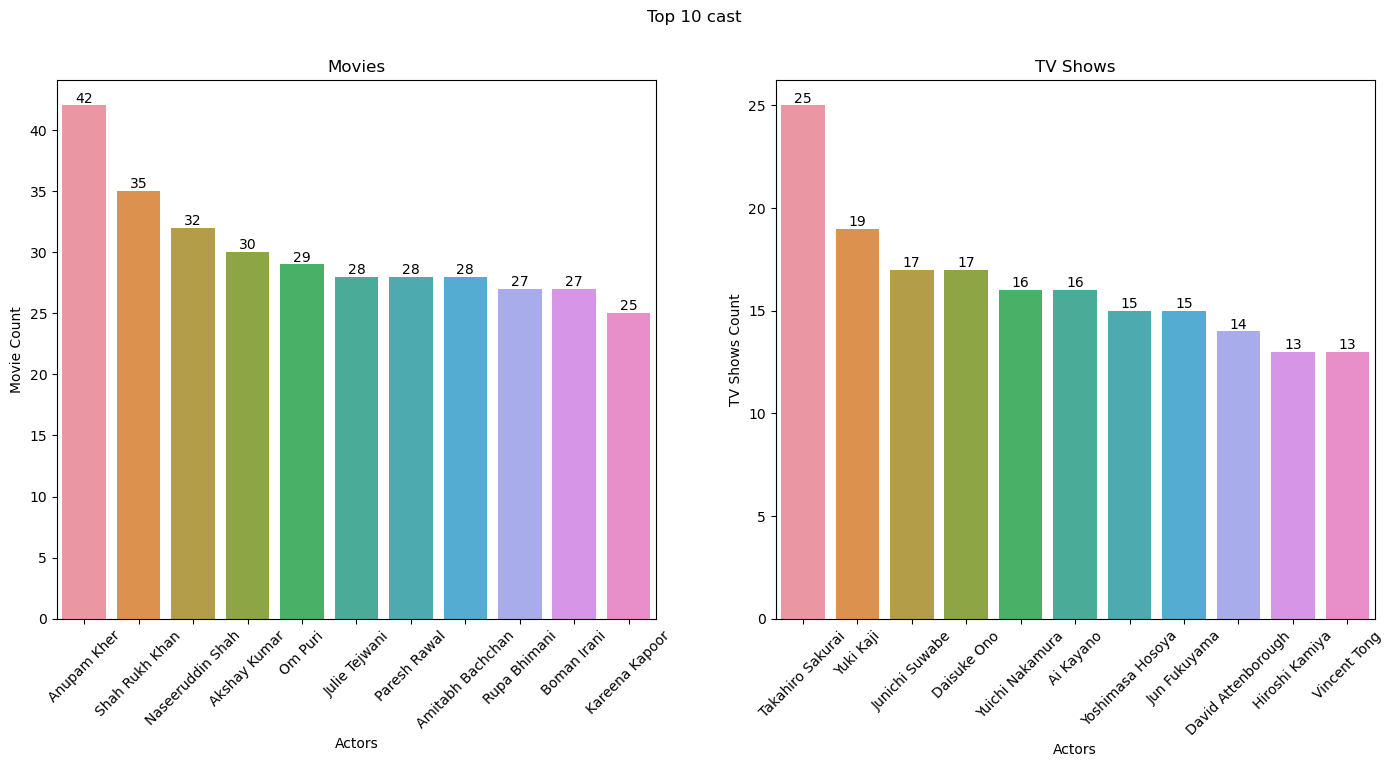

In [64]:
data_movies_temp=data_movies.drop_duplicates(subset=['cast','title'])
data_tvs_temp=data_tvs.drop_duplicates(subset=['cast','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 cast')
plt.subplot(1,2,1)
label=sns.countplot(data=data_movies_temp,x='cast',order=data_movies_temp["cast"].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=data_tvs_temp,x='cast',order=data_tvs_temp["cast"].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('TV Shows Count')
plt.show()

In [69]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 722.1 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 958.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 979.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud

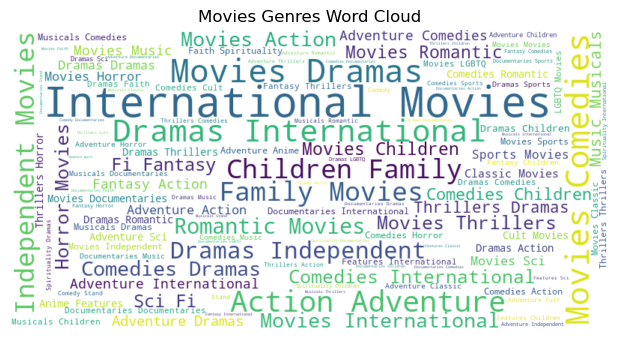

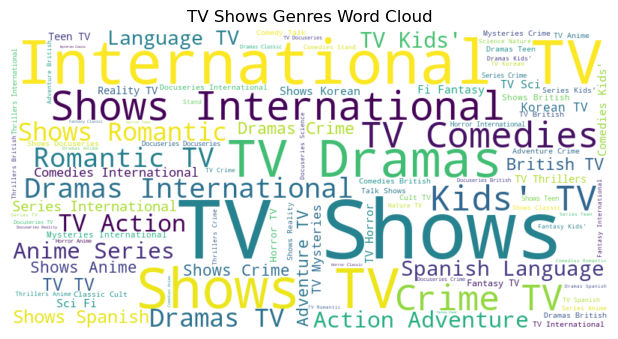

In [74]:
genre_text=" ".join(data_movies["genre"])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)

plt.figure(figsize=(17,10))
plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Movies Genres Word Cloud')

genre_text=" ".join(data_tvs["genre"])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)

plt.figure(figsize=(17,10))
plt.subplot(1,2,2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('TV Shows Genres Word Cloud')
plt.show()

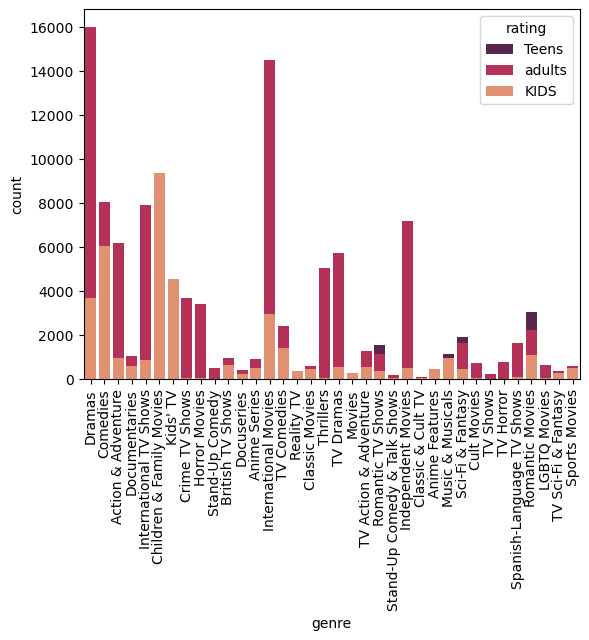

In [77]:
sns.countplot(data=data_new,x='genre',hue='rating',dodge=False,order=data_temp['genre'].value_counts().index,palette='rocket')
plt.xticks(rotation=90)
plt.show()